In [1]:
!git clone https://github.com/dreyco676/pytrends

fatal: destination path 'pytrends' already exists and is not an empty directory.


In [84]:
from pytrends.request import TrendReq
import pandas as pd
keyword = '우유'
pytrend = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)
pytrend.build_payload(kw_list=[keyword], timeframe='2019-07-01 2019-09-30')
cointrenddf = pytrend.interest_over_time()
cointrenddf=cointrenddf.iloc[:,:1]

In [85]:
cointrenddf

,우유
date,
2019-07-01,60
2019-07-02,52
2019-07-03,75
2019-07-04,70
2019-07-05,84
2019-07-06,75
2019-07-07,61
2019-07-08,79
2019-07-09,72


In [25]:
OAI = pd.read_csv("Online.csv")
oaimilk = OAI[(OAI["sech_kwd"]=="우유")]
oaimilk.shape

(8985, 14)

In [26]:
oaimilk = oaimilk[["sess_dt","sech_kwd"]]
oaimilk['sess_dt'] = pd.to_datetime(oaimilk['sess_dt'], format='%Y%m%d')
oaimilk['milk_count'] = 1
oaimilk_date = oaimilk.groupby("sess_dt").sum()
oaimilk_date.head()

,milk_count
sess_dt,
2019-07-01,70
2019-07-02,147
2019-07-03,87
2019-07-04,73
2019-07-05,43


In [46]:
TFI = pd.read_csv("transfer.csv")
PDI = pd.read_csv("ProductInfo.csv")
merge1 = TFI.merge(PDI, on="pd_c")[["de_dt","clac_nm3"]]
merge1.dropna(inplace = True)

In [47]:
merge1 = merge1[merge1["clac_nm3"].str.contains("Milk|milk")]
merge1["clac_nm3"].factorize()


(array([0, 0, 0, ..., 6, 6, 6], dtype=int64),
 Index(['Functional Milk', 'Fresh Milk', 'Flavored Milk',
        'Cream and Condensed milk', 'General Soy Milk', 'Milk Vetch Roots',
        'Breastmilk Storage Goods'],
       dtype='object'))

In [51]:
merge1 = merge1[(merge1["clac_nm3"]!="Milk Vetch Roots")&(merge1["clac_nm3"]!="Breastmilk Storage Goods")]
tfimilk = merge1

In [53]:
tfimilk['de_dt'] = pd.to_datetime(tfimilk['de_dt'], format='%Y%m%d')
tfimilk['milk_count'] = 1
tfimilk_date = tfimilk.groupby("de_dt").sum()
tfimilk_date.head()

,milk_count
de_dt,
2019-07-01,309
2019-07-02,311
2019-07-03,323
2019-07-04,263
2019-07-05,297


<IPython.core.display.Javascript object>


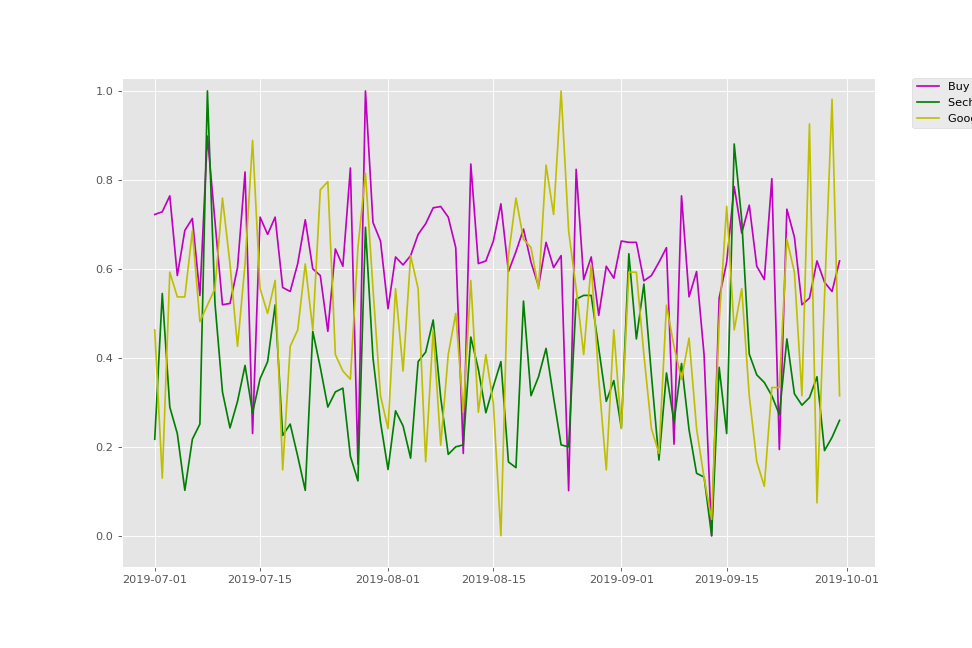

In [56]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
tfimilkT=MinMaxScaler().fit_transform(tfimilk_date)
oaimilkT=MinMaxScaler().fit_transform(oaimilk_date)
gooT = MinMaxScaler().fit_transform(cointrenddf)

plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
plt.plot(tfimilk_date.index,tfimilkT,c='m', label="Buy count")
plt.plot(oaimilk_date.index,oaimilkT,c='g', label="Sech count")
plt.plot(cointrenddf.index,gooT,c='y', label="Google Trned")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [72]:
cors = pd.DataFrame([tfimilk_date["milk_count"],oaimilk_date["milk_count"],cointrenddf["우유"]],columns = ["buy","","google"]).T
cors.corr()

,milk_count,milk_count,우유
milk_count,1.000000,0.480687,0.062810
milk_count,0.480687,1.000000,0.086394
우유,0.062810,0.086394,1.000000


In [65]:
cointrenddf["우유"]

date
2019-07-01    71
2019-07-02    53
2019-07-03    78
2019-07-04    75
2019-07-05    75
              ..
2019-09-26    96
2019-09-27    50
2019-09-28    75
2019-09-29    99
2019-09-30    63
Name: 우유, Length: 92, dtype: int32